# Convex polyhedron

In [1]:
import fresnel
import math
device = fresnel.Device()
scene = fresnel.Scene(device)

The **convex polyhedron geometry** defines a set of *N* convex polyhedra. The shape of all *N* polyhedra is identical and defined by *P* planes. Each polyhedron has its own *position*, *orientation*, and *color*. You must also specify the circumsphere radius *r* (**fresnel** currently doesn't attempt to calculate this).

The planes of the polyhedron are given as a set of *P* origins and outward pointing normals. Construct a truncated cube:

In [2]:
origins=[];
normals=[];
colors=[];

for v in [-1, 1]:
    origins.append([v, 0, 0])
    normals.append([v, 0, 0])
    colors.append(fresnel.color.linear([0.70,0.87,0.54])*0.8) 
    
    origins.append([0, v, 0])
    normals.append([0, v, 0])
    colors.append(fresnel.color.linear([0.70,0.87,0.54])*0.8)
    
    origins.append([0, 0, v])
    normals.append([0, 0, v])
    colors.append(fresnel.color.linear([0.70,0.87,0.54])*0.8)

for x in [-1,1]:
    for y in [-1,1]:
        for z in [-1,1]:
            normals.append([x,y,z])
            origins.append([x*0.75, y*0.75, z*0.75])
            colors.append(fresnel.color.linear([0.65,0.81,0.89])*0.8)

In [3]:
geometry = fresnel.geometry.ConvexPolyhedron(scene,
                                             N=3,
                                             origins=origins,
                                             normals=normals,
                                             face_colors=fresnel.color.linear(colors),
                                             r=math.sqrt(3)
                                            )
geometry.material = fresnel.material.Material(color=fresnel.color.linear([0.25,0.5,0.9]),
                                              roughness=0.8)

## Geometric properties

**position** defines the position of the center of each convex polyhedron.

In [4]:
geometry.position[:] = [[-3,0,0], [0, 0, 0], [3, 0, 0]]

**orientation** sets the orientation of each convex polyhedron as a quaternion

In [5]:
geometry.orientation[:] = [[1, 0, 0, 0],
                           [ 0.80777943,  0.41672122,  0.00255412,  0.41692838],
                           [0.0347298, 0.0801457, 0.98045, 0.176321]]

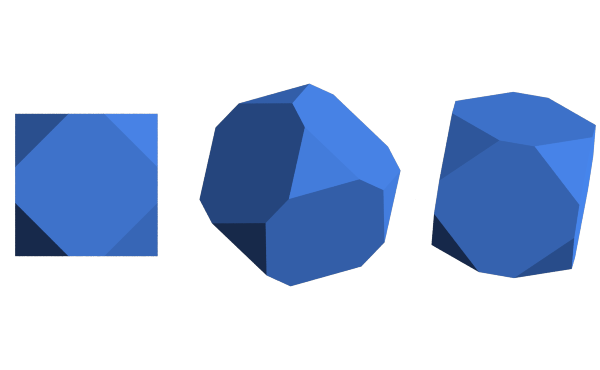

In [6]:
scene.camera = fresnel.camera.fit(scene, view='front', margin=0.5)
fresnel.preview(scene, aa_level=3)

## Color

**color** sets the color of each individual convex polyhedron (when *primitive_color_mix > 0* and *color_by_face < 1* )

In [7]:
geometry.color[:] = fresnel.color.linear([[0.9,0,0], [0, 0.9, 0], [0, 0, 0.9]])
geometry.material.primitive_color_mix = 1.0

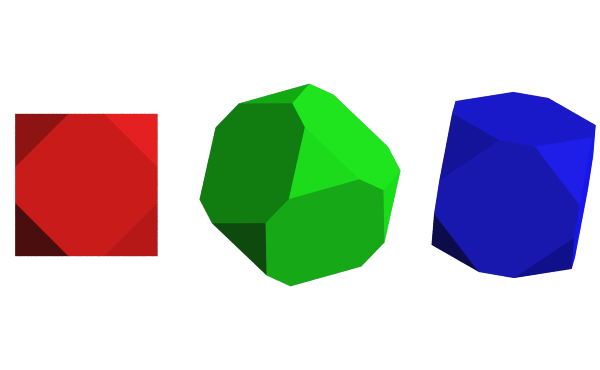

In [8]:
fresnel.preview(scene, aa_level=3)

set **color_by_face** > 0 to color the faces of the polyhedra independently. **face_colors** (set above) sets the color of each face.

In [9]:
geometry.color_by_face = 1.0

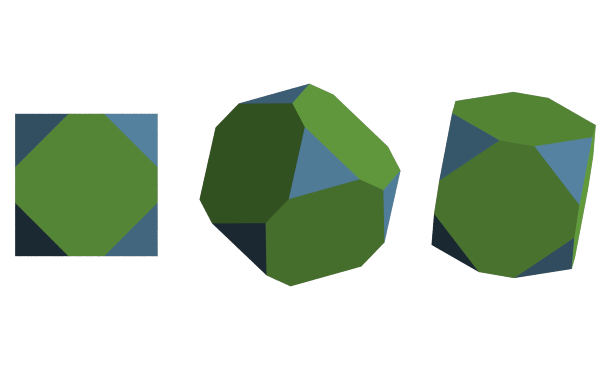

In [10]:
fresnel.preview(scene, aa_level=3)

## Outlines

Outlines are applied at the outer edge of each face.

In [11]:
geometry.outline_width = 0.02

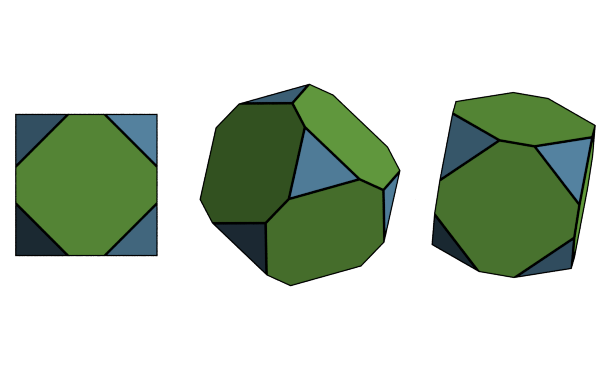

In [12]:
fresnel.preview(scene, aa_level=3)

This page was generated from a [jupyter](https://jupyter.org/) notebook. You can download and run the notebook locally from the [fresnel-examples](https://bitbucket.org/glotzer/fresnel-examples) repository.